<h1>
<center>CFRM 521 Final Project</center>
</h1>

<h1>
<center>Aviral Sharma</center>
</h1>

<h1>
<center>Bored-Ape NFT Floor Price Predictor</center>
</h1>

# Introduction
---
During the 2020-2022 time period, a new digital asset started gaining a lot of popularity: NFTs (Non Fungible Tokens). Everywhere 
on the internet, people were just talking about NFTs and shilling different collections. There was a huge demand for it, as people saw it as a gateway to Web 3.0. A lot of Collections soared in prices with their floor price being above 100 ETH (Ethereum).

So one might ask what are NFTs and how are they that different from crypto-curriencies? While the coins are simply an encrypted form of digital currency that rely on a certain blockchain technology, NFTs are one of a kind digital assets that are stored on blockchain and cannot be duplicated. They can represent anything from photos to music to videos. Both these assets don't rely on government or any financial institutions. We know that the price of a crypto-currency is dependent on many factors such as market beta, trading volume, attractiveness and volatility, but what factors influence the  price of an NFT? NFTs vary widely within a category and across different categories such as arts, music, sports, club memberships, games etc. Unlike cryptocurrencies, every NFT is distinct, and the value of an NFT may be more personal to a particular buyer rather than universal across all buyers. 

Essentially, it's the individual buyer's readiness to pay that primarily influences the peak price of an NFT. In addition, the value of NFTs isn't solely based on the artistic quality or their scarcity, though these aspects are important. Their worth largely stems from the substantial benefits they offer to owners in both real and virtual worlds, by design. Another factor which is the previous sales of the related NFTs as it captures the risk and reward associated with marketing new NFTs. This does not mean that NFTs are not affect by the factors effecting prices of crypto-currencies. In the early days, one of the biggest factors driving the prices of NFTs was exclusivitey and hype. Even if the NFT provided no utility, their prices were going high. But post the NFT bubble burst, there wasn't herd investing happening more and only those NFTs were performing well that provided some real-world utilities - be it giving access to certain tools like custom trading algorithms or early seed investing opportunities in popular upcoming projects. 

So how does one exactly figure out the price of an NFT collection? Before we get into that, I want to make a brief distinction. There are two types of prices associated with an NFT: the individual price of the NFT and the floor price of the NFT Collection.
This project will focus on the floor price of the NFT collection and not the individual prices of the assets as that is another genre on its own. 

# Problem Statement
---
This brings us to to question: ***What does the Floor Price of an NFT Collection mean?*** 

An NFT floor price is the lowest price at which an NFT from a particular collection is listed for sale in the marketplace. Essentially, it's the minimum price a buyer would need to pay to own an NFT from that collection. The floor price can fluctuate based on various factors, including:

1. **Rarity and Uniqueness:** NFTs that are rarer or have unique attributes tend to have higher floor prices. Collectors value rarity and are often willing to pay more for items that are scarce.

2. **Artist or Creator Reputation:** The reputation and popularity of the artist or creator can significantly impact the floor price. Well-known and respected artists can command higher prices for their work.

3. **Collection Popularity:** The overall popularity and demand for a particular NFT collection can drive up the floor price. Collections that gain viral attention or have strong community support tend to have higher floor prices.

4. **Market Sentiment:** The overall sentiment and trends within the NFT market can influence floor prices. Positive news, trends, or hype around NFTs can drive prices up, while negative sentiment can lead to price drops.

5. **Utility and Functionality:** NFTs that offer additional utility or functionality, such as access to exclusive content, events, or communities, can have higher floor prices. Buyers are often willing to pay more for NFTs that provide extra value beyond mere ownership.

6. **Historical Sales and Volume:** Past sales data and the volume of transactions within a collection can impact the floor price. High trading volume and strong sales history can indicate strong demand and drive up prices.

7. **Scarcity and Supply:** The total supply of NFTs in a collection can affect the floor price. Limited supply collections tend to have higher floor prices due to scarcity.

Now that we know what a floor price is, we can discuss our problem statement. We want to be able to predict the floor price of an NFT Collection. In our case, we will be focusing on the NFT Collection: ***Bored Ape Yatch Club*** , one of the most famous NFT Collections. Why do we want to predict the price? It allows for good entry opportunities from an investment standpoint.



# Data
---
One of the biggest challenges in this project was getting data. Unlike crypto-currencies, the floor price of Collections is not easy to get. OpenSea, Magic Eden (the leading marketplaces), do not provide the historical data for Collections through APIs. This makes data-collection a tedius process as we have to resort to scraping.

## Sources

I found an API service called NFTFloorPrice that gives historical data and used that to collect the historical floor price.

I am also a firm believer that the gas prices also effect the price of an nft collection to some extent as
if the gas price is high, the volume of transactions would decrease and thus that would effect the nft floor 
price. I scrapped this data from https://ycharts.com/indicators/ethereum_average_gas_price .

The price of ethereum also plays a big role in the nft floor price, so I got the historicald data of ethereum 
from coinmarketcap.com

## Data Collection Code

I have not included the api call code I wrote as it contains personal information like API ket, but I will 
leave the skeleton code here:

### Skeleton code to get historical NFT floor price

```
slugs = ['bored-ape-yacht-club']
temp = []
for s in slugs:
    url = 'https://api.nftpricefloor.com/api/projects/' + s+ '/charts/1d?qapikey=xxxx'
    print(s)
    response = requests.get(url)
    if response.status_code == 200:
        # Print the response content
        print('success')
        df = pd.DataFrame(response.json())
        df['Date'] = pd.to_datetime(df['timestamps'], unit='ms').dt.strftime('%Y-%m-%d')
        temp.append(df)
    else:
        print('Failed to fetch data. for ', s )
nfts = pd.concat(temp)
```

# Data Pre-Processing + Feature Engineering
---

The following section focuses on preprocessing the raw data and doing the required feature engineering.

In [222]:
# Adding all the required libraries over here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
mean_absolute_percentage_error, explained_variance_score, r2_score
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor, KerasClassifier
import keras_tuner as kt

In [223]:
pd.options.mode.chained_assignment = None  # default='warn'
# Ignore all warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [224]:
# Let us read all the data
nfts = pd.read_csv('HistoricalBoredApe.csv')
eth_fee = pd.read_json('ethGas.json')
eth_price = pd.read_csv('HistoricalEthPrice.csv')

In [225]:
# let us look at the transaction fee raw data
eth_fee.head()

,data
0,"{'date': 1592208001, 'gas': 52}"
1,"{'date': 1592211602, 'gas': 35}"
2,"{'date': 1592215201, 'gas': 40}"
3,"{'date': 1592217001, 'gas': 33}"
4,"{'date': 1592218802, 'gas': 26}"


In [226]:
# We need to convert the data into a more readable format
txn_fee = pd.DataFrame(columns=['Date', 'Fee'])
for r, i in eth_fee.iterrows():
    t = {'Date': i['data']['date'], 'Fee': i['data']['gas']}
    txn_fee.loc[len(txn_fee.index)] = t 
txn_fee['Date'] = pd.to_datetime(txn_fee['Date'], unit='s').dt.strftime('%Y-%m-%d')
txn_fee['Date'] = pd.to_datetime(txn_fee['Date'])

In [227]:
txn_fee.head()

,Date,Fee
0,2020-06-15,52.0
1,2020-06-15,35.0
2,2020-06-15,40.0
3,2020-06-15,33.0
4,2020-06-15,26.0


As you can see, a single data has multiple gas prices. Let us plot it once:

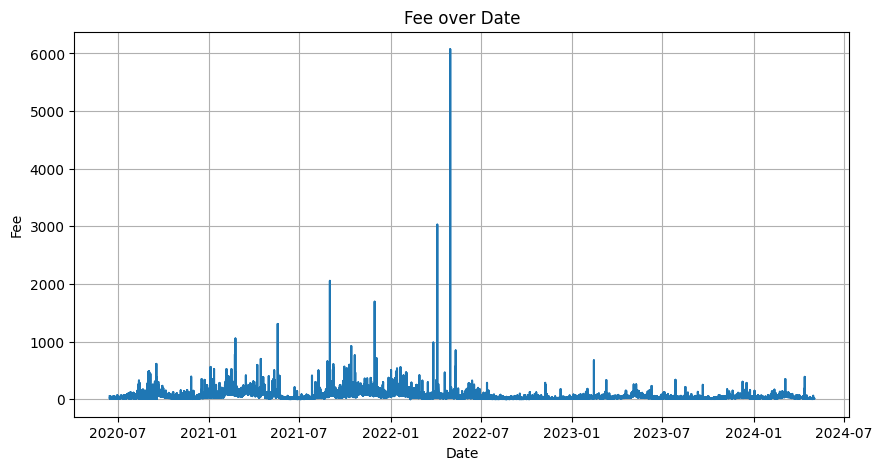

In [229]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(txn_fee['Date'], txn_fee['Fee'])

# Adding title and labels
plt.title('Fee over Date')
plt.xlabel('Date')
plt.ylabel('Fee')

# Show the plot
plt.grid(True)
plt.show()

As you can see, the gas price is extremely high for certain time periods, where it could make sense that no one buys the NFTs as who would want to buy a collection at a time where you might have to pay an equal amount in transaction feess. This would definitely lead to a decrease in trading volume which would affect the floor price.

In [230]:
# Let us take percentiles of the transaction fee: This will also help us overcome outliers
txn_fee = txn_fee.groupby('Date')['Fee'].agg(
    Mean='mean',
    Median='median',
    Percentile_75=lambda x: x.quantile(0.75),
    Percentile_25=lambda x: x.quantile(0.25)
)
txn_fee

,Mean,Median,Percentile_75,Percentile_25
Date,,,,
2020-06-15,28.250000,26.5,32.75,21.625
2020-06-16,26.741667,24.0,31.25,20.100
2020-06-17,29.745833,30.0,34.00,23.750
2020-06-18,25.789583,25.0,30.00,22.000
2020-06-19,27.304255,29.0,31.00,21.000
...,...,...,...,...
2024-04-28,6.770833,6.5,8.00,5.000
2024-04-29,8.791667,9.0,11.00,7.000
2024-04-30,13.446809,9.0,16.00,7.000


In [231]:
# Convert the Date column to a Date Datatype
nfts['Date'] = pd.to_datetime(nfts['Date'])
# let us now look at nft data
nfts.head()

,Unnamed: 0,slug,granularity,timestamps,floorNative,floorUsd,salesCount,volumeNative,volumeUsd,Date
0,0,bored-ape-yacht-club,1d,1669248000000,57.5000,65071.025000,34,3011.8099,3.410201e+06,2022-11-24
1,1,bored-ape-yacht-club,1d,1669334400000,60.0000,70940.400000,30,2644.3863,3.082716e+06,2022-11-25
2,2,bored-ape-yacht-club,1d,1669420800000,61.0000,71976.950000,17,1142.4831,1.364037e+06,2022-11-26
3,3,bored-ape-yacht-club,1d,1669507200000,61.8557,74683.953623,59,4027.3183,4.851646e+06,2022-11-27
4,4,bored-ape-yacht-club,1d,1669593600000,69.3000,83549.466000,28,2055.4876,2.494101e+06,2022-11-28


In [232]:
# Let us remove some unnecessary columns like granularity and timestamps (we already have Date). 
# We also do not need the slug column as we are only dealing with one nft
nfts = nfts[['floorNative', 'floorUsd', 'salesCount', 'volumeNative', 'volumeUsd', 'Date']]
nfts.head()

,floorNative,floorUsd,salesCount,volumeNative,volumeUsd,Date
0,57.5000,65071.025000,34,3011.8099,3.410201e+06,2022-11-24
1,60.0000,70940.400000,30,2644.3863,3.082716e+06,2022-11-25
2,61.0000,71976.950000,17,1142.4831,1.364037e+06,2022-11-26
3,61.8557,74683.953623,59,4027.3183,4.851646e+06,2022-11-27
4,69.3000,83549.466000,28,2055.4876,2.494101e+06,2022-11-28


In [233]:
# merging the data-set
merged_data = pd.merge(nfts, txn_fee, on='Date', how='inner')
merged_data.head()

,floorNative,floorUsd,salesCount,volumeNative,volumeUsd,Date,Mean,Median,Percentile_75,Percentile_25
0,57.5000,65071.025000,34,3011.8099,3.410201e+06,2022-11-24,11.687500,11.5,12.0,11.0
1,60.0000,70940.400000,30,2644.3863,3.082716e+06,2022-11-25,10.723404,10.0,11.0,10.0
2,61.0000,71976.950000,17,1142.4831,1.364037e+06,2022-11-26,10.083333,10.0,11.0,9.0
3,61.8557,74683.953623,59,4027.3183,4.851646e+06,2022-11-27,10.125000,10.0,10.0,9.0
4,69.3000,83549.466000,28,2055.4876,2.494101e+06,2022-11-28,13.354167,11.0,13.0,10.0


In [234]:
# let us now look at the ethereum price
eth_price.head()

,Unnamed: 0,Symbol,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
0,0,ETH,2024-05-15,2881.224634,3041.602315,2864.735445,3037.056645,1.466690e+10,3.646761e+11,2024-05-15T00:00:00.000Z,2024-05-15T23:47:00.000Z,2024-05-15T00:55:00.000Z,2024-05-15T23:59:59.999Z
1,1,ETH,2024-05-14,2949.213176,2959.546555,2863.545842,2881.158053,1.244452e+10,3.460783e+11,2024-05-14T00:00:00.000Z,2024-05-14T01:41:00.000Z,2024-05-14T17:40:00.000Z,2024-05-14T23:59:59.999Z
2,2,ETH,2024-05-13,2928.814051,2994.869213,2865.134481,2949.359561,1.335226e+10,3.542396e+11,2024-05-13T00:00:00.000Z,2024-05-13T09:28:00.000Z,2024-05-13T03:16:00.000Z,2024-05-13T23:59:59.999Z
3,3,ETH,2024-05-12,2911.658220,2953.047466,2902.201951,2928.702013,5.908941e+09,3.517834e+11,2024-05-12T00:00:00.000Z,2024-05-12T16:22:00.000Z,2024-05-12T07:35:00.000Z,2024-05-12T23:59:59.999Z
4,4,ETH,2024-05-11,2909.845510,2942.178664,2888.083369,2911.602056,6.795916e+09,3.497167e+11,2024-05-11T00:00:00.000Z,2024-05-11T15:20:00.000Z,2024-05-11T11:18:00.000Z,2024-05-11T23:59:59.999Z


In [235]:
eth_price['Date'] = pd.to_datetime(eth_price['Date'])
finalData = pd.merge(merged_data, eth_price, on='Date', how='inner')

In [236]:
# Let us only extract the useful columns. We are only interested in the closing price of ETh
finalData = finalData[['Date', 'floorNative',	'floorUsd',	'salesCount',	'volumeNative',	\
                       'volumeUsd', 'Mean', 'Close']]
finalData  = finalData .rename(columns={'Close': 'EthPrice', 'Mean' : 'Gas'})
finalData.head()

,Date,floorNative,floorUsd,salesCount,volumeNative,volumeUsd,Gas,EthPrice
0,2022-11-24,57.5000,65071.025000,34,3011.8099,3.410201e+06,11.687500,1203.983203
1,2022-11-25,60.0000,70940.400000,30,2644.3863,3.082716e+06,10.723404,1198.925936
2,2022-11-26,61.0000,71976.950000,17,1142.4831,1.364037e+06,10.083333,1205.897939
3,2022-11-27,61.8557,74683.953623,59,4027.3183,4.851646e+06,10.125000,1195.126919
4,2022-11-28,69.3000,83549.466000,28,2055.4876,2.494101e+06,13.354167,1170.086160


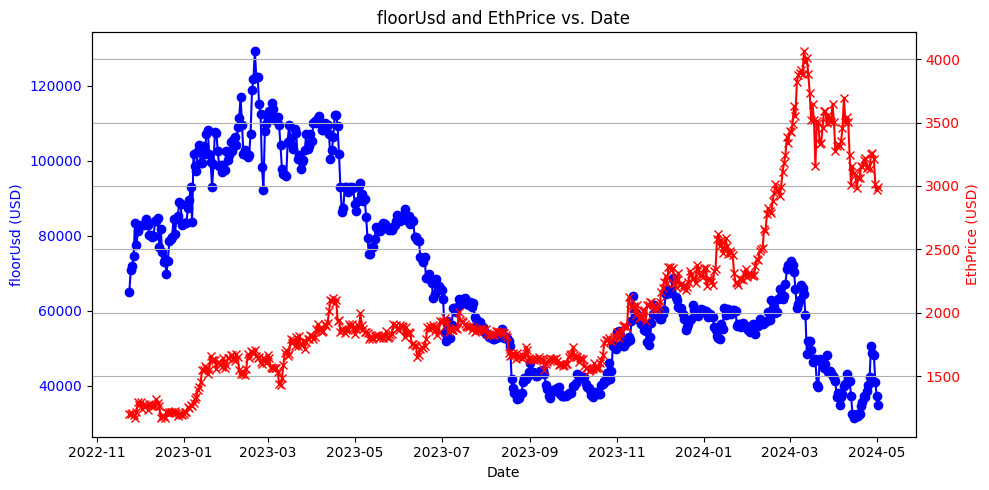

In [237]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot floorUsd
ax1.plot(finalData['Date'], finalData['floorUsd'], color='blue', marker='o', label='floorUsd')
ax1.set_xlabel('Date')
ax1.set_ylabel('floorUsd (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot EthPrice
ax2 = ax1.twinx()
ax2.plot(finalData['Date'], finalData['EthPrice'], color='red', marker='x', label='EthPrice')
ax2.set_ylabel('EthPrice (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add a title
plt.title('floorUsd and EthPrice vs. Date')

# Show the plot
fig.tight_layout()
plt.grid(True)
plt.show()


There seems to be some kind of a negative trend between floorusd and ethereum price. As one is increasing, the other is decreasing.

# Feature Engineering
---
Now that we have all the data available to us, it is time to come up with a few features of our own that might be helpful in price prediction such as :

1. 7 day moving average
2. 10 day moving average
3. Volatility
4. Crossing of 7 Day MA and 10 day MA

The reason for this is, when 7d MA and 10d MA cross, it provides a good investing opportunity which indirectly
means that price might be changing. The reason for that is:

When analyzing moving averages (MAs) for financial time series data, crossovers are often used as signals for potential trend changes. Here's why a crossover between the 7-day and 10-day moving averages might be considered a good investing opportunity:

## Types of Crossovers

1. Golden Cross: When a shorter-term moving average (e.g., 7-day MA) crosses above a longer-term moving average (e.g., 10-day MA), it is often considered a bullish signal. This suggests that the asset's price might be starting an upward trend. Investors might view this as a buying opportunity.

2. Death Cross: When a shorter-term moving average crosses below a longer-term moving average, it is often considered a bearish signal. This suggests that the asset's price might be starting a downward trend. Investors might view this as a selling opportunity or a signal to avoid buying.

## Why Crossovers are Significant

1. Trend Confirmation: Moving average crossovers help confirm changes in the trend. If the price has been moving down and the 7-day MA crosses above the 10-day MA, it indicates a potential reversal to an uptrend.

2. Momentum: The crossover indicates a shift in momentum. When the shorter-term MA moves above the longer-term MA, it suggests that recent prices are higher than the average over a longer period, indicating increasing buying interest.

3. Simplicity: Moving averages smooth out price data, making it easier to identify trends and reversals. Crossovers provide clear, actionable signals that are easy to interpret.

A trend reversal is definitely a factor to look into for price prediction as a result

In [238]:
# Convert the 'Date' column to datetime
finalData['Date'] = pd.to_datetime(finalData['Date'])

# Sort the data by date
finalData = finalData.sort_values(by='Date')


In [239]:
# Create moving average features
finalData ['floorUsd_7d_MA'] = finalData ['floorUsd'].rolling(window=7).mean()
finalData ['floorUsd_10d_MA'] = finalData ['floorUsd'].rolling(window=10).mean()

# Create volatility features (rolling standard deviation)
finalData ['floorUsd_7d_STD'] = finalData ['floorUsd'].rolling(window=7).std()
finalData ['floorUsd_10d_STD'] = finalData ['floorUsd'].rolling(window=10).std()

# Create daily percentage change
finalData['floorUsd_pct_change'] = finalData['floorUsd'].pct_change()

# Create crossover feature
finalData['MA_crossover'] = 0  # Initialize with 0

# Set 1 if 7-day MA crosses above 10-day MA, -1 if crosses below
for i in range(1, len(finalData)):
    if finalData.loc[i-1, 'floorUsd_7d_MA'] <= finalData.loc[i-1, 'floorUsd_10d_MA'] and \
       finalData.loc[i, 'floorUsd_7d_MA'] > finalData.loc[i, 'floorUsd_10d_MA']:
        finalData.loc[i, 'MA_crossover'] = 1
    elif finalData.loc[i-1, 'floorUsd_7d_MA'] >= finalData.loc[i-1, 'floorUsd_10d_MA'] and \
         finalData.loc[i, 'floorUsd_7d_MA'] < finalData.loc[i, 'floorUsd_10d_MA']:
        finalData.loc[i, 'MA_crossover'] = -1

In [240]:
finalData.head()

,Date,floorNative,floorUsd,salesCount,volumeNative,volumeUsd,Gas,EthPrice,floorUsd_7d_MA,floorUsd_10d_MA,floorUsd_7d_STD,floorUsd_10d_STD,floorUsd_pct_change,MA_crossover
0,2022-11-24,57.5000,65071.025000,34,3011.8099,3.410201e+06,11.687500,1203.983203,NaN,NaN,NaN,NaN,NaN,0
1,2022-11-25,60.0000,70940.400000,30,2644.3863,3.082716e+06,10.723404,1198.925936,NaN,NaN,NaN,NaN,0.090200,0
2,2022-11-26,61.0000,71976.950000,17,1142.4831,1.364037e+06,10.083333,1205.897939,NaN,NaN,NaN,NaN,0.014612,0
3,2022-11-27,61.8557,74683.953623,59,4027.3183,4.851646e+06,10.125000,1195.126919,NaN,NaN,NaN,NaN,0.037609,0
4,2022-11-28,69.3000,83549.466000,28,2055.4876,2.494101e+06,13.354167,1170.086160,NaN,NaN,NaN,NaN,0.118707,0


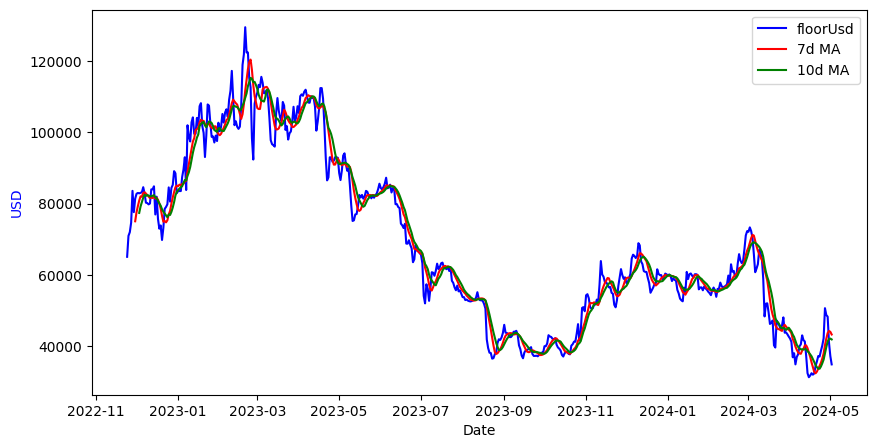

In [241]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot floorUsd
ax1.plot(finalData['Date'], finalData['floorUsd'], color='blue', label='floorUsd')
ax1.plot(finalData['Date'], finalData ['floorUsd_7d_MA'], color='red', label='7d MA')
ax1.plot(finalData['Date'], finalData ['floorUsd_10d_MA'], color='green', label='10d MA')
ax1.set_xlabel('Date')
ax1.set_ylabel('USD', color='blue')
plt.legend()
plt.show()

In [242]:
# We need to get rid of the NA values because of introducing moving averages
finalData = finalData.dropna()
finalData.head()

,Date,floorNative,floorUsd,salesCount,volumeNative,volumeUsd,Gas,EthPrice,floorUsd_7d_MA,floorUsd_10d_MA,floorUsd_7d_STD,floorUsd_10d_STD,floorUsd_pct_change,MA_crossover
9,2022-12-03,65.00,82863.950000,7,513.17000,6.573070e+05,11.562500,1243.334897,80817.625175,77371.175122,3373.291923,6439.176470,-0.001191,0
10,2022-12-04,66.77,82994.708887,8,552.54820,7.084685e+05,11.395833,1280.256594,82004.875927,79163.543511,2062.579564,4959.519881,0.001578,0
11,2022-12-05,66.99,83178.803400,13,920.02000,1.154123e+06,13.270833,1259.676700,81951.924127,80387.383851,2020.648687,4148.572821,0.002218,0
12,2022-12-06,66.99,84578.394680,11,861.05160,1.080765e+06,13.978723,1271.653843,82951.343538,81647.528319,940.954561,3088.427170,0.016826,0
13,2022-12-07,66.50,82793.830000,18,1513.49941,1.904977e+06,14.875000,1232.437441,83157.125281,82458.515957,643.842906,1888.299264,-0.021100,0


After much thought, I have also decided to drop : floorNative, volumeNative since we already have that information in floorUsd and volumeUsd. So having those columns would just lead to overfitting in my opinion

In [243]:
finalData = finalData[['Date','floorUsd','salesCount','volumeUsd','Gas','EthPrice',	\
                       'floorUsd_7d_MA','floorUsd_10d_MA','floorUsd_7d_STD','floorUsd_10d_STD','floorUsd_pct_change',\
                       'MA_crossover']]
finalData.head()

,Date,floorUsd,salesCount,volumeUsd,Gas,EthPrice,floorUsd_7d_MA,floorUsd_10d_MA,floorUsd_7d_STD,floorUsd_10d_STD,floorUsd_pct_change,MA_crossover
9,2022-12-03,82863.950000,7,6.573070e+05,11.562500,1243.334897,80817.625175,77371.175122,3373.291923,6439.176470,-0.001191,0
10,2022-12-04,82994.708887,8,7.084685e+05,11.395833,1280.256594,82004.875927,79163.543511,2062.579564,4959.519881,0.001578,0
11,2022-12-05,83178.803400,13,1.154123e+06,13.270833,1259.676700,81951.924127,80387.383851,2020.648687,4148.572821,0.002218,0
12,2022-12-06,84578.394680,11,1.080765e+06,13.978723,1271.653843,82951.343538,81647.528319,940.954561,3088.427170,0.016826,0
13,2022-12-07,82793.830000,18,1.904977e+06,14.875000,1232.437441,83157.125281,82458.515957,643.842906,1888.299264,-0.021100,0


# Model Selection and Implementation
---

In this section, I will go through all the different models I have chosen and why:

## Linear Regression

Linear regression is the most basic regression model that assumes a linear relationship between the dependent and independent variables. I will be using it as a good baseline model to compare with more complex models. 

## Ridge Regression

This is used to address multicollinearity in the dataset by adding a penalty to the size of the coefficients. This regularization helps to prevent overfitting by constraining the magnitude of the coefficients

## Lasso Regression

Lasso regression is similar to Ridge but uses L1 regularization, which can drive some coefficients to zero, effectively performing feature selection.

## Random Forest Regressor

Random Forest is an ensemble learning method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It handles non-linearity well, is less prone to overfitting than individual decision trees. It also provides feature importance, which is useful for understanding the model.

## Gradient Boosting Regressor

Gradient Boosting is another ensemble technique that builds models sequentially, each new model correcting errors made by the previous ones. It is powerful, capable of capturing complex patterns, and often achieves better performance than Random Forest. It is prone to overfitting though


In [245]:
# Check for non-finite values
if np.any(~np.isfinite(finalData)):
    print("Data contains non-finite values (NaN, inf). Please handle these before proceeding.")

# Replace non-finite values with a placeholder (e.g., median or mean)
finalData.replace([np.inf, -np.inf], np.nan, inplace=True)
finalData.fillna(finalData.median(), inplace=True)

# Define feature variables (X) and target variable (y)
# We dont need the date column either
X = finalData.drop(columns=['floorUsd', 'Date'])
y = finalData['floorUsd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [246]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

In [247]:
# Define models and parameter grids for GridSearchCV
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'param_grid': {}
    },
    'Ridge': {
        'model': Ridge(random_state=42),
        'param_grid': {
            'alpha': [0.1, 1.0, 10.0, 100.0, 200.0]
        }
    },
    'Lasso': {
        'model': Lasso(max_iter=10000, random_state=42),
        'param_grid': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

In [248]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    return mse, rmse, r2, mae, mape, explained_variance

In [249]:
# Initialize results dictionary
results = {}
feature_importances = {}

# Perform GridSearchCV for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model_info in models.items():
    try:
        print(model_name, model_info)
        grid_search = GridSearchCV(estimator=model_info['model'], param_grid=model_info['param_grid'], cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train)
        
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # history = best_model.fit(X_train_scaled, y_train)
        mse, rmse, r2, mae, mape, explained_variance = evaluate_model(best_model, X_test_scaled, y_test)
        
        # Perform k-fold cross-validation
        cv_results = cross_val_score(best_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
        
        results[model_name] = {
            'Best Parameters': best_params,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae,
            'MAPE': mape,
            'Explained Variance': explained_variance,
            'Cross-Validation Scores': cv_results,
            'Mean CV MSE': np.mean(cv_results),
            'Std CV MSE': np.std(cv_results)
        }
        
        # Get feature importances for models that support it
        if hasattr(best_model, 'feature_importances_'):
            feature_importances[model_name] = best_model.feature_importances_
        elif hasattr(best_model, 'coef_'):
            feature_importances[model_name] = best_model.coef_

        print('****')
    except Exception as e:
        print(f"Error with model {model_name}: {e}")
    
# Convert results to DataFrame
finalResults = pd.DataFrame(results).T

LinearRegression {'model': LinearRegression(), 'param_grid': {}}
****
Ridge {'model': Ridge(random_state=42), 'param_grid': {'alpha': [0.1, 1.0, 10.0, 100.0, 200.0]}}
****
Lasso {'model': Lasso(max_iter=10000, random_state=42), 'param_grid': {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}}
****
RandomForest {'model': RandomForestRegressor(random_state=42), 'param_grid': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}}
****
GradientBoosting {'model': GradientBoostingRegressor(random_state=42), 'param_grid': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}}
****


In [250]:
finalResults

,Best Parameters,MSE,RMSE,R2,MAE,MAPE,Explained Variance,Cross-Validation Scores,Mean CV MSE,Std CV MSE
LinearRegression,{},15929527.418894,3991.181206,0.9763,2594.741457,0.034646,0.977121,"[-8433394.556564346, -5933990.390974598, -7395...",-7960534.852764,1200168.425399
Ridge,{'alpha': 0.1},15881146.542822,3985.115625,0.976372,2607.572458,0.035036,0.977199,"[-7865438.656261054, -6118379.4635524135, -763...",-7972242.742033,1131879.288466
Lasso,{'alpha': 1.0},15877900.055436,3984.708277,0.976377,2593.86677,0.034669,0.977202,"[-8351899.271991068, -5954051.6348929675, -743...",-7959019.720273,1183703.543847
RandomForest,"{'bootstrap': True, 'max_depth': None, 'min_sa...",16651023.059353,4080.566512,0.975227,2691.385588,0.038517,0.976207,"[-9007875.186357267, -12390087.25497985, -1176...",-12431161.991089,2043123.310785
GradientBoosting,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",15839821.060528,3979.927268,0.976434,2530.614329,0.034917,0.97769,"[-8868525.878557462, -8170486.038673327, -9423...",-10726695.541972,2406147.525765


# Feature Importance
___

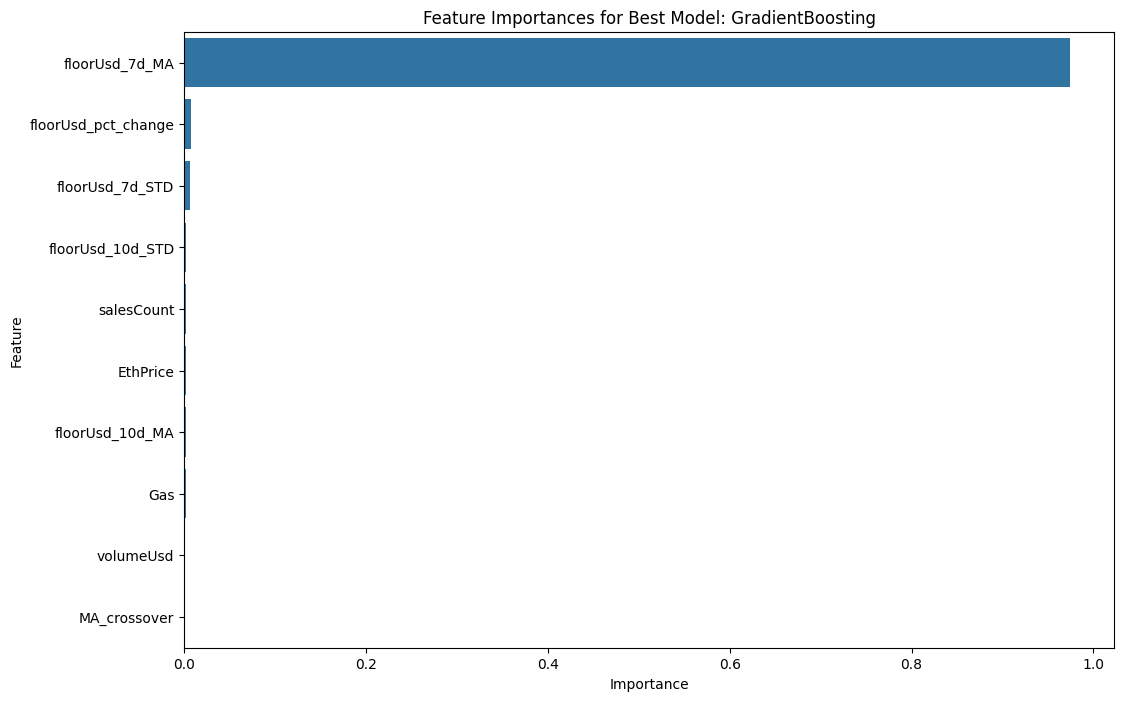

In [254]:
# Plot feature importances for the best performing model
best_model_name = finalResults['R2'].idxmax()
if best_model_name in feature_importances:
    importances = feature_importances[best_model_name]
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importances for Best Model: {best_model_name}')
    plt.show()

# Result Analysis
---
## Performance Metrics

1. ***Mean Squared Error (MSE):*** Measures the average of the squares of the errors (the average squared difference between the estimated values and the actual value).
2. ***Root Mean Squared Error (RMSE):*** The square root of MSE, providing error magnitude in the same units as the output.
3. ***R-squared (R2):*** Represents the proportion of variance in the dependent variable that is predictable from the independent variables (ranges from 0 to 1, with higher values indicating better fit).
4. ***Mean Absolute Error (MAE):*** The average absolute difference between the predicted values and the actual values.
5. ***Mean Absolute Percentage Error (MAPE):*** The average absolute percentage difference between the predicted values and the actual values.
6. ***Explained Variance:*** Measures the proportion of variance explained by the model (similar to R-squared).
7. Cross-Validation Scores (CV Scores): List of cross-validation scores.

***Conclusion***

1. ***Best Model:*** Gradient Boosting shows the best overall performance with the lowest MSE, RMSE, and MAE, and the highest R2 and Explained Variance. However, it also has high variability in cross-validation scores.
2. ***Consistent Models:*** Ridge and Lasso offer consistent performance with low variability and high explained variance, making them reliable choices.
3. ***Reliable Choice:*** Linear Regression is also reliable but slightly less consistent compared to Ridge and Lasso.
Worst Model: Random Forest performs the worst with the highest error metrics and the lowest explained variance, along with high variability.


## Cross Validation Scores

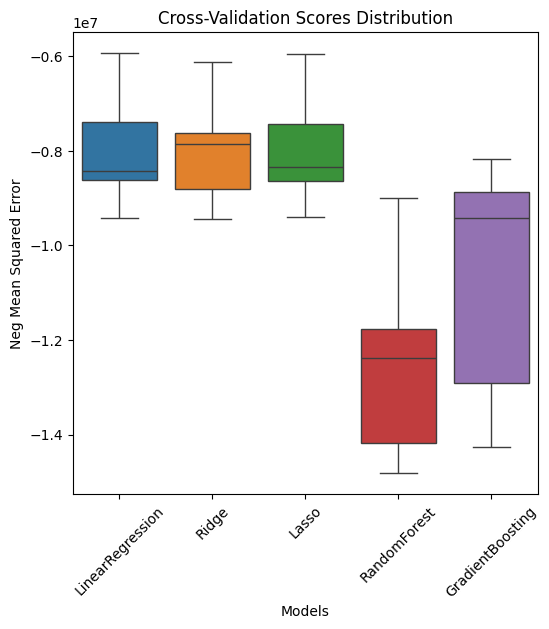

In [251]:
cv_scores = {model: results[model]['Cross-Validation Scores'] for model in results.keys()}

plt.figure(figsize=(6, 6))
sns.boxplot(data=pd.DataFrame(cv_scores))
plt.title('Cross-Validation Scores Distribution')
plt.ylabel('Neg Mean Squared Error')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

1. ***Consistent Performance:***
Linear Regression, Ridge, and Lasso: These models show consistent performance with lower variability, as indicated by their narrow IQRs.
2. ***Median Performance:***
Gradient Boosting: While it has a higher median NMSE (closer to zero) compared to Random Forest, its large IQR indicates that it performs very well in some cases but poorly in others.
3. ***Variability:***
Random Forest: It has the lowest median NMSE, suggesting worse average performance, and high variability.

## Predictive Analysis
---

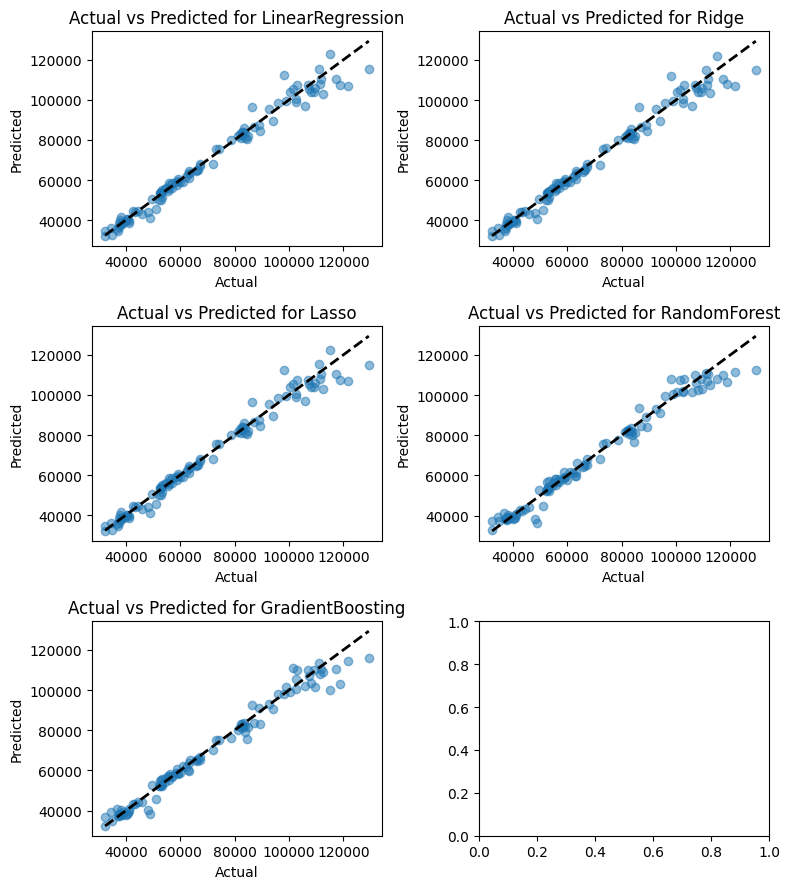

In [256]:
n_models = len(results)
fig, axes = plt.subplots((n_models + 1) // 2, 2, figsize=(8, 3 * ((n_models + 1) // 2)))

if n_models == 1:
    axes = [axes]

for ax, model_name in zip(axes.flatten(), results.keys()):
    
    best_model = models[model_name]['model']
    best_model.set_params(**results[model_name]['Best Parameters'])
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)
    
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'Actual vs Predicted for {model_name}')

plt.tight_layout()
plt.show()


1. Linear Regression: The points are closely clustered around the diagonal line.
Some deviations are noticeable at higher values, but overall, it shows a good fit.

2. Ridge: Very similar to Linear Regression, with points closely following the diagonal line.
Slightly better handling of higher values compared to Linear Regression.

3. Lasso: Similar performance to Ridge and Linear Regression.
Points are well-aligned with the diagonal line, indicating good predictive performance.

4. Random Forest: Points are more scattered compared to the linear models.
The model tends to underpredict or overpredict more frequently, indicating less accuracy.

5. Gradient Boosting: Points are closely aligned with the diagonal line, indicating strong predictive performance.
This model shows the least scatter among the points, especially at higher values.

***Conclusion:***
Based on the scatter plots:

1. ***Best Model:*** Gradient Boosting demonstrates the best predictive performance with the least scatter around the diagonal line, indicating that it closely matches the actual values.
2. ***Next Best Models:*** Ridge and Lasso both perform well and show similar, reliable predictions with points closely clustered around the diagonal line.
3. ***Consistent Models:*** Linear Regression also performs well but shows slightly more scatter at higher values.
4. ***Worst Model:*** Random Forest has the most scatter, indicating it is less reliable and has higher prediction errors.

# Residual Distribution
---

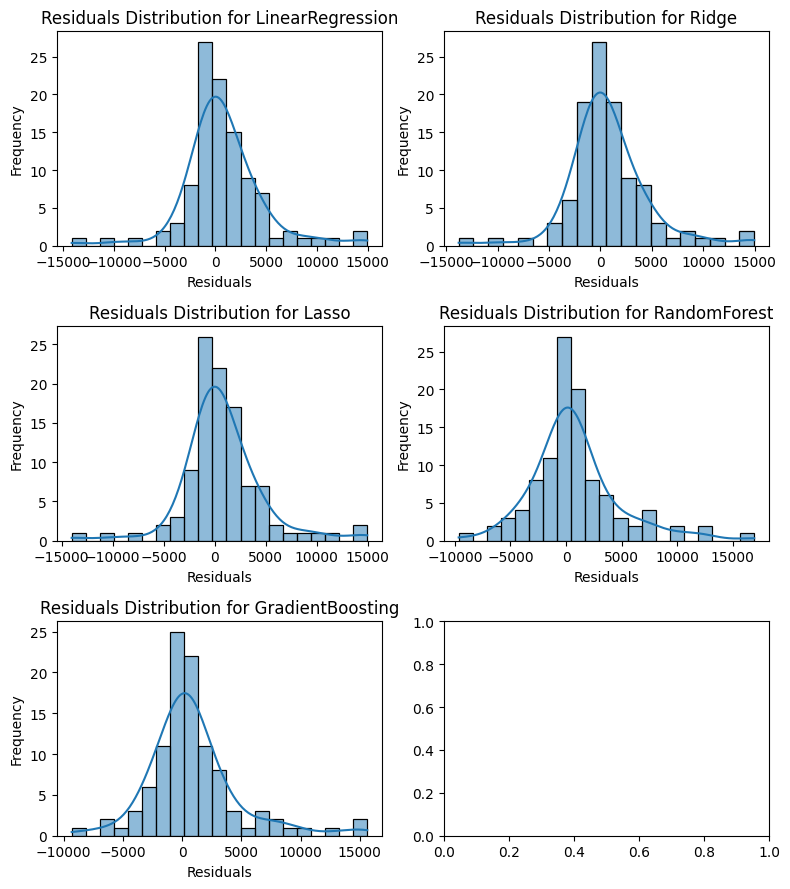

In [257]:
n_models = len(results)
fig, axes = plt.subplots((n_models + 1) // 2, 2, figsize=(8, 3 * ((n_models + 1) // 2)))

if n_models == 1:
    axes = [axes]

for ax, model_name in zip(axes.flatten(), results.keys()):
    
    best_model = models[model_name]['model']
    best_model.set_params(**results[model_name]['Best Parameters'])
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)
    residuals = y_test - y_pred
    
    sns.histplot(residuals, kde=True, ax=ax)
    ax.set_title(f'Residuals Distribution for {model_name}')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


1. Linear Regression: The residuals are roughly centered around zero, with a slight skew towards positive values.
The distribution is relatively symmetric, indicating that errors are fairly evenly distributed.

2. Ridge: Similar to Linear Regression, the residuals are centered around zero with a slight positive skew.
The distribution is quite symmetric, suggesting unbiased predictions.

3. Lasso: The residuals are also centered around zero, with a slight positive skew.
The distribution appears slightly more spread out compared to Ridge and Linear Regression, but it is still relatively symmetric.

4. Random Forest: The residuals are centered around zero but show a broader spread compared to the linear models.
There is a noticeable skew, indicating that some predictions have larger errors, and the distribution is less symmetric.

5. Gradient Boosting: The residuals are centered around zero, with a slight positive skew.
The distribution is relatively symmetric, similar to Ridge and Linear Regression, but with a broader spread than Lasso.

***Conclusion***

1. Best Models for Unbiased Predictions:

Linear Regression, Ridge, and Lasso are strong performers, with residuals well-centered around zero and relatively
symmetric distributions.

2. Model with More Variability:

Random Forest has a broader and less symmetric residual distribution, indicating higher variability in prediction errors.

3. Potential Best Model with Larger Errors:

Gradient Boosting shows a good distribution but with a broader spread of residuals. This model might provide better overall 
predictive power (as indicated in the scatter plots), but it also has larger individual errors.

# Overall Results
___

Overall, Gradient Boosting is the best-performing model in terms of predictive power, while Ridge and Lasso are the most consistent and reliable models. Random Forest is the least effective model in this comparison.
